In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# version check

In [5]:
version = 'v1'

# label load

In [6]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# trained model load

In [10]:
encoder = load_model('./weights/residual_encoder_ls64_{}.h5'.format(version))
decoder = load_model('./weights/residual_decoder_ls64_{}.h5'.format(version))

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### train data

In [11]:
train_encode = encoder.predict(one_hot_train_labels)
train_encode

array([[1.8590649 , 0.        , 0.7684824 , ..., 0.        , 2.9285526 ,
        1.0438806 ],
       [1.503368  , 0.        , 1.6712687 , ..., 0.        , 1.554926  ,
        0.8823578 ],
       [2.8197017 , 0.        , 1.1041248 , ..., 0.        , 0.81670904,
        4.2012053 ],
       ...,
       [1.1397387 , 0.        , 2.88789   , ..., 0.        , 2.73184   ,
        0.73727995],
       [1.8933976 , 0.        , 2.7585154 , ..., 0.        , 2.3906913 ,
        1.3667718 ],
       [3.141152  , 0.        , 1.213001  , ..., 0.        , 0.9703717 ,
        0.8173023 ]], dtype=float32)

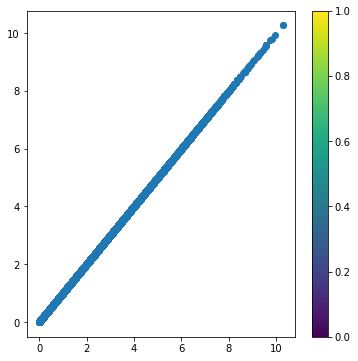

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(train_encode[:, :], train_encode[:, :])
plt.colorbar()
plt.show()

In [13]:
train_encode_df = pd.DataFrame(train_encode)
train_encode_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.859065,0.0,0.768482,4.208251,0.299953,1.829271,0.549787,0.875938,4.559343,2.447888,...,1.068475,0.988764,4.023951,0.933374,0.0,2.543880,0.000000,0.0,2.928553,1.043881
1,1.503368,0.0,1.671269,3.332441,0.379955,0.000000,0.420594,2.498717,1.378190,4.072253,...,0.494116,3.401626,1.402863,0.709119,0.0,4.646207,3.521524,0.0,1.554926,0.882358
2,2.819702,0.0,1.104125,4.511050,2.193634,2.065551,0.699897,3.954691,0.258508,4.074126,...,1.989702,0.368869,2.444483,0.601464,0.0,3.300735,5.817879,0.0,0.816709,4.201205
3,0.950928,0.0,2.743537,2.777191,1.854041,3.136917,1.585593,1.659128,0.739964,2.388241,...,2.188068,1.046049,2.570028,0.000000,0.0,0.000000,1.579502,0.0,4.306474,0.238258
4,2.429588,0.0,2.151260,3.216333,0.784559,1.691281,0.430679,1.358677,2.250579,1.687131,...,1.214011,1.853834,1.531043,1.683950,0.0,5.088216,2.837656,0.0,0.000000,1.549347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0.542204,0.0,2.601285,1.840448,0.389547,2.070192,1.202173,2.518716,1.124654,2.202389,...,3.306703,3.799414,3.557182,0.000000,0.0,1.503757,3.547506,0.0,5.004233,0.131174
2801,3.664947,0.0,0.626962,0.581019,0.000000,2.856927,0.000000,0.145338,1.086746,2.486792,...,0.645899,0.000000,1.518692,0.560103,0.0,1.743693,2.647182,0.0,0.689267,2.292974
2802,1.139739,0.0,2.887890,1.844434,0.978103,2.868803,0.405209,0.000000,2.172990,0.990353,...,2.259139,1.710425,1.534153,0.711135,0.0,0.000000,1.237338,0.0,2.731840,0.737280
2803,1.893398,0.0,2.758515,3.033492,0.736422,1.959595,0.711334,1.353843,3.535809,2.639570,...,2.361314,1.530630,3.216768,1.008312,0.0,2.007342,1.402147,0.0,2.390691,1.366772


In [14]:
train_encode_df.to_excel('./rae_ls64_{}_latent_vector_train.xlsx'.format(version))

In [15]:
train_decode = decoder.predict(train_encode)
train_decode

array([[5.19067273e-20, 1.96283258e-06, 1.59954784e-26, ...,
        4.57348178e-12, 2.10475735e-18, 1.81686211e-11],
       [4.35984053e-14, 1.42559955e-13, 7.14220638e-09, ...,
        3.07418901e-07, 9.41233374e-20, 6.03978478e-05],
       [1.44590737e-21, 2.35280765e-16, 9.29555546e-18, ...,
        7.37538274e-19, 1.99126638e-14, 1.33410106e-11],
       ...,
       [3.96459168e-12, 2.05784656e-16, 3.90253524e-10, ...,
        5.66451854e-16, 4.15142829e-04, 9.06564335e-09],
       [8.42089561e-19, 9.78114515e-15, 1.43456584e-16, ...,
        1.69263421e-17, 2.93363597e-11, 8.94389007e-09],
       [1.12603215e-26, 4.18546465e-15, 1.16933877e-27, ...,
        1.58366171e-15, 9.41951729e-20, 2.43483467e-12]], dtype=float32)

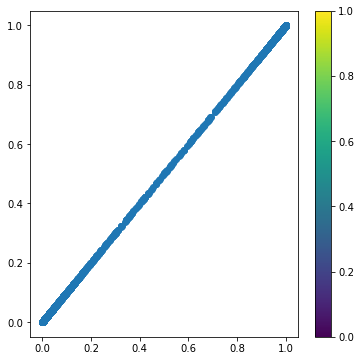

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train_decode[:, :], train_decode[:, :])
plt.colorbar()
plt.show()

In [17]:
train_predict = train_decode.round()
train_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
"""train_predict = np.where(train_decode > 0.5, 1, 0)
train_predict"""

'train_predict = np.where(train_decode > 0.5, 1, 0)\ntrain_predict'

In [19]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [20]:
#c_matrix.shape

In [21]:
#c_matrix

In [22]:
print('accuracy : ', accuracy_score(one_hot_train_labels, train_predict))
print('precision : ', precision_score(one_hot_train_labels, train_predict, average='micro'))
print('recall : ', recall_score(one_hot_train_labels, train_predict, average='micro'))
print('f1 : ', f1_score(one_hot_train_labels, train_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_train_labels, train_predict))

accuracy :  0.9704099821746881
precision :  0.9905857740585774
recall :  0.9910004185851821
f1 :  0.9907930529399456
------------------------
hamming_loss :  0.0001197425535099536


In [23]:
train_predict_df = pd.DataFrame(train_predict)
train_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#train_predict_df.to_excel('./train_latent_vector.xlsx')

### validation data

In [25]:
val_encode = encoder.predict(one_hot_val_labels)
val_encode

array([[0.97556424, 0.        , 1.6986033 , ..., 0.        , 2.4499004 ,
        1.319041  ],
       [2.146861  , 0.        , 2.2515957 , ..., 0.        , 0.        ,
        0.5692644 ],
       [0.33472216, 0.        , 1.7677823 , ..., 0.        , 1.1305403 ,
        1.4860401 ],
       ...,
       [2.929448  , 0.        , 4.444677  , ..., 0.        , 0.95247984,
        1.8720876 ],
       [2.2172017 , 0.        , 0.        , ..., 0.        , 0.9768872 ,
        0.9744189 ],
       [0.9509276 , 0.        , 2.7435367 , ..., 0.        , 4.3064747 ,
        0.23825754]], dtype=float32)

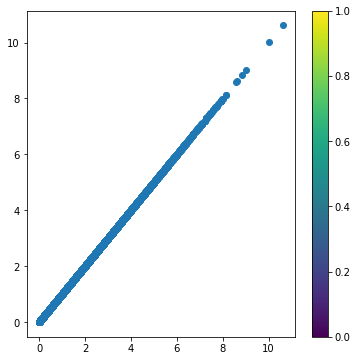

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(val_encode[:, :], val_encode[:, :])
plt.colorbar()
plt.show()

In [27]:
val_encode_df = pd.DataFrame(val_encode)
val_encode_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.975564,0.0,1.698603,0.825450,0.679568,1.048623,0.548835,2.351269,0.000000,3.581206,...,2.731234,1.499718,1.009095,0.000000,0.0,1.342696,3.852439,0.0,2.449900,1.319041
1,2.146861,0.0,2.251596,1.369750,0.216136,0.251116,0.649305,1.678851,0.468371,2.144354,...,2.310529,1.904618,0.407024,1.961398,0.0,3.935543,2.119132,0.0,0.000000,0.569264
2,0.334722,0.0,1.767782,5.394941,1.133812,0.000000,1.333045,3.623545,1.650426,4.047481,...,2.847691,2.218239,2.552304,0.413375,0.0,4.027470,2.335804,0.0,1.130540,1.486040
3,1.878717,0.0,0.237748,4.948579,0.375578,0.000000,1.519852,3.323231,3.201345,2.186207,...,2.630978,2.885851,2.300232,0.000000,0.0,4.668746,1.966404,0.0,1.454632,1.750944
4,4.101379,0.0,2.606388,0.981125,0.366505,1.759244,0.956917,2.015815,0.384175,5.998785,...,3.832008,1.800635,1.561169,0.000000,0.0,1.870930,2.288014,0.0,3.869269,1.738205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,1.802560,0.0,1.587461,4.627356,0.498222,1.724201,0.587015,2.908261,1.970190,3.502609,...,1.218225,2.083348,2.934301,0.435996,0.0,4.133583,3.076900,0.0,2.287173,1.056643
931,1.893398,0.0,2.758515,3.033492,0.736422,1.959596,0.711334,1.353843,3.535809,2.639570,...,2.361314,1.530629,3.216768,1.008312,0.0,2.007342,1.402147,0.0,2.390692,1.366772
932,2.929448,0.0,4.444677,1.866635,0.987381,2.167695,0.171970,0.628170,3.027721,1.042448,...,2.969559,1.926105,2.365925,1.031104,0.0,1.788936,1.801119,0.0,0.952480,1.872088
933,2.217202,0.0,0.000000,5.284184,0.014590,2.797025,0.396394,0.244705,3.688993,1.166239,...,0.000000,0.564461,2.156883,0.778674,0.0,3.706711,2.157487,0.0,0.976887,0.974419


In [28]:
val_encode_df.to_excel('./rae_ls64_{}_latent_vector_val.xlsx'.format(version))

In [29]:
val_decode = decoder.predict(val_encode)
val_decode

array([[1.3950868e-18, 5.1782208e-17, 7.2520455e-18, ..., 8.9966663e-14,
        2.0826143e-14, 3.4070583e-11],
       [5.3358320e-25, 1.2326366e-16, 5.8932988e-21, ..., 7.7701396e-17,
        1.2034502e-14, 4.3007684e-11],
       [1.3576249e-22, 1.0637716e-12, 2.8727051e-26, ..., 2.7723488e-12,
        8.1840744e-26, 2.9125027e-09],
       ...,
       [6.5528780e-14, 2.3707997e-16, 5.0220002e-08, ..., 1.0984455e-28,
        2.8651909e-08, 1.7897181e-04],
       [2.0691809e-17, 2.0044820e-10, 1.7791183e-16, ..., 4.4259129e-04,
        8.5648733e-14, 2.9564207e-10],
       [3.7189065e-07, 8.5991594e-08, 8.1113791e-01, ..., 7.8931162e-10,
        1.1325842e-08, 1.4443407e-07]], dtype=float32)

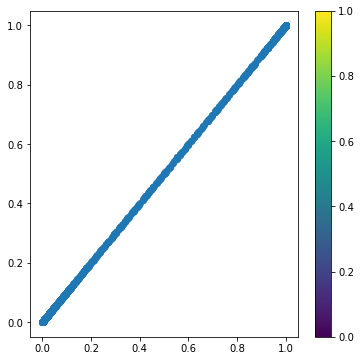

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(val_decode[:, :], val_decode[:, :])
plt.colorbar()
plt.show()

In [31]:
val_predict = val_decode.round()
val_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
"""val_predict = np.where(val_decode > 0.5, 1, 0)
val_predict"""

'val_predict = np.where(val_decode > 0.5, 1, 0)\nval_predict'

In [33]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [34]:
#c_matrix.shape

In [35]:
#c_matrix

In [36]:
print('accuracy : ', accuracy_score(one_hot_val_labels, val_predict))
print('precision : ', precision_score(one_hot_val_labels, val_predict, average='micro'))
print('recall : ', recall_score(one_hot_val_labels, val_predict, average='micro'))
print('f1 : ', f1_score(one_hot_val_labels, val_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_val_labels, val_predict))

accuracy :  0.8096256684491978
precision :  0.9335180055401662
recall :  0.8367473618870267
f1 :  0.8824877250409165
------------------------
hamming_loss :  0.0014654855696615912


In [37]:
val_predict_df = pd.DataFrame(val_predict)
val_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#val_predict_df.to_excel('./val_latent_vector.xlsx')

### test data

In [39]:
test_encode = encoder.predict(one_hot_test_labels)
test_encode

array([[2.8973937 , 0.        , 2.430467  , ..., 0.        , 3.305915  ,
        0.8668379 ],
       [2.1970513 , 0.        , 1.650359  , ..., 0.        , 1.8672732 ,
        1.0587937 ],
       [2.068614  , 0.        , 2.188759  , ..., 0.        , 1.4199378 ,
        1.3305787 ],
       ...,
       [3.4945784 , 0.        , 2.8110926 , ..., 0.        , 3.8479044 ,
        0.8891897 ],
       [0.790727  , 0.        , 2.3436792 , ..., 0.        , 4.0606413 ,
        1.5351504 ],
       [3.2204156 , 0.        , 0.06762197, ..., 0.        , 2.3732517 ,
        2.4022858 ]], dtype=float32)

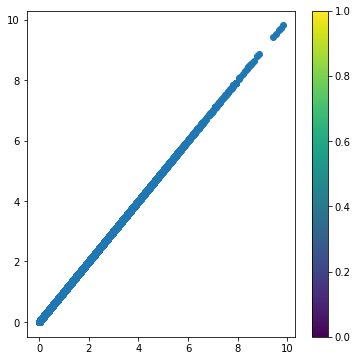

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(test_encode[:, :], test_encode[:, :])
plt.colorbar()
plt.show()

In [41]:
test_encode_df = pd.DataFrame(test_encode)
test_encode_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,2.897394,0.0,2.430467,5.470337,1.023333,3.250161,1.808790,1.809577,3.241730,2.979927,...,1.724370,2.669310,2.628493,0.000000,0.0,2.861607,2.786877,0.0,3.305915,0.866838
1,2.197051,0.0,1.650359,1.051105,0.000000,0.522087,1.221114,1.867954,1.385166,3.236677,...,1.721751,1.911091,1.704715,0.580422,0.0,3.561583,2.446083,0.0,1.867273,1.058794
2,2.068614,0.0,2.188759,2.989452,0.563915,3.100077,0.000000,1.644134,2.181427,1.303193,...,0.000000,1.366693,2.067188,1.122288,0.0,1.944655,4.497924,0.0,1.419938,1.330579
3,1.802560,0.0,1.587461,4.627357,0.498222,1.724200,0.587015,2.908260,1.970191,3.502609,...,1.218225,2.083348,2.934301,0.435996,0.0,4.133583,3.076900,0.0,2.287174,1.056643
4,1.144965,0.0,0.000000,4.148048,0.992492,0.689115,0.337940,2.922622,0.785970,3.838092,...,0.000000,0.000000,2.727664,1.663665,0.0,4.201086,2.123586,0.0,0.519155,1.757320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2.157738,0.0,2.574679,1.679128,0.689120,2.701783,0.533735,1.919042,1.049675,1.595294,...,1.090602,0.950331,2.587833,0.893670,0.0,1.719681,3.192332,0.0,1.893287,0.471967
931,3.046409,0.0,2.843873,3.155958,1.075289,3.249340,1.252380,2.462117,1.450358,2.889375,...,1.913887,1.993651,2.355115,0.195466,0.0,2.337923,3.795005,0.0,3.479585,1.185263
932,3.494578,0.0,2.811093,1.444410,0.000000,3.056445,0.300975,0.308933,1.844930,4.824278,...,2.187046,2.284416,2.117782,0.020285,0.0,0.803474,1.749591,0.0,3.847904,0.889190
933,0.790727,0.0,2.343679,2.384608,1.575888,1.797486,0.000000,1.239733,2.212777,3.939019,...,1.755615,2.938772,2.560087,0.252346,0.0,2.433876,1.607416,0.0,4.060641,1.535150


In [42]:
test_encode_df.to_excel('./rae_ls64_{}_latent_vector_test.xlsx'.format(version))

In [43]:
test_decode = decoder.predict(test_encode)
test_decode

array([[1.9452043e-05, 1.7726591e-12, 9.9965334e-01, ..., 1.1875109e-08,
        1.5482103e-11, 1.3411084e-05],
       [6.7992406e-19, 1.9831930e-14, 3.2266629e-21, ..., 2.8151688e-16,
        1.4097746e-22, 2.6678367e-07],
       [4.6575345e-23, 1.2275148e-20, 2.3859147e-16, ..., 3.5192118e-09,
        1.5887030e-05, 1.7760817e-11],
       ...,
       [5.9238319e-16, 1.0387466e-20, 1.2042320e-06, ..., 2.0137880e-12,
        4.0472000e-07, 1.2442492e-08],
       [3.6644110e-08, 2.4767148e-11, 1.5742497e-12, ..., 5.9614513e-20,
        1.0564402e-15, 7.7005069e-08],
       [5.1535883e-17, 1.7168794e-15, 2.7425398e-15, ..., 4.3896881e-10,
        1.3235670e-08, 8.4291610e-14]], dtype=float32)

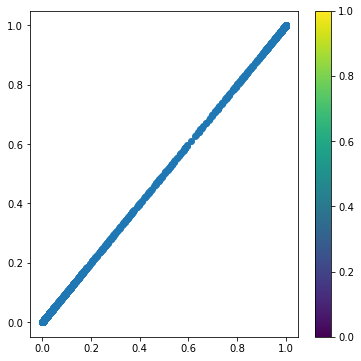

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [45]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [47]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [48]:
#c_matrix.shape

In [49]:
#c_matrix

In [50]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.8010695187165775
precision :  0.9290969899665552
recall :  0.8362432269717038
f1 :  0.8802281368821293
------------------------
hamming_loss :  0.001543046087275993


In [51]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.8010695187165775
precision :  0.9275401069518716
recall :  0.8933868092691621
f1 :  0.9034262410198239
------------------------
hamming_loss :  0.001543046087275993


C:\Users\user\.conda\envs\mlc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')